In [471]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyteomics import pepxml
import os
pd.set_option('display.max_colwidth', None)
import numpy as np

In [402]:
scanscomp = pd.read_csv("psmstoscanwithpfind.csv", sep="\t")
scanscomp_bare = scanscomp.drop(scanscomp.filter(regex="Unnamed|Site|Peptide|spectrum|scannumber|Spectrum_file"), axis=1)

In [403]:
html = scanscomp_bare.to_html()

In [404]:
# write html to file
text_file = open("index.html", "w")
text_file.write(html)
text_file.close()

In [405]:
scanscomp_bare.head()

,Sequence,PTM,Found_by_ionbot,Found_by_MSFragger,Found_by_pFind,Project,ionbot_PSM,fragger_PSM,pfind_PSM
0,AQGPAASAEEPKPVEAPAANSDQTVTVKE,Acetyl,0,1,1,PXD002516,NaN,"AQGPAASAEEPKPVEAPAANSDQTVTVKE/nan/Mod1: Acetylation (PeakApex: 42.0108, Theoretical: 42.0106)","AQGPAASAEEPKPVEAPAANSDQTVTVKE/0,Acetyl[AnyN-term];"
1,AQGPAASAEEPKPVEAPAANSDQTVTVKE,Acetyl,0,1,1,PXD002516,NaN,NaN,NaN
2,AQGPAASAEEPKPVEAPAANSDQTVTVKE,Acetyl,0,1,1,PXD002516,NaN,"AQGPAASAEEPKPVEAPAANSDQTVTVKE/nan/Mod1: Acetylation (PeakApex: 42.0108, Theoretical: 42.0106)","AQGPAASAEEPKPVEAPAANSDQTVTVKE/0,Acetyl[ProteinN-term];"
3,AQGPAASAEEPKPVEAPAANSDQTVTVKE,Acetyl,0,1,1,PXD002516,NaN,"AQGPAASAEEPKPVEAPAANSDQTVTVKE/nan/Mod1: Acetylation (PeakApex: 42.0108, Theoretical: 42.0106)",NaN
4,AQGPAASAEEPKPVEAPAANSDQTVTVKE,Acetyl,0,1,1,PXD002516,NaN,NaN,NaN


## Checking ionbot

In [406]:
notfoundbyionbot = scanscomp_bare[scanscomp_bare["Found_by_ionbot"] == 0]
notfoundbyionbot = notfoundbyionbot.drop(notfoundbyionbot.filter(regex="Found|fragger|pfind"), axis=1)
notfoundbyionbot.shape

(2351, 4)

In [407]:
Foundornot = notfoundbyionbot.groupby(["Sequence","PTM"]).count().reset_index()
print(Foundornot.shape)

(686, 4)


In [408]:
Foundornot["ionbot_PSM"].value_counts()[0]

264

In [409]:
percentage_no_psm = 264/685*100
percentage_psm = 100-percentage_no_psm
print("Another PSM was found by ionbot for {:.2f}% of cases".format(percentage_psm))

Another PSM was found by ionbot for 61.46% of cases


In [410]:
otherPSMs = notfoundbyionbot[notfoundbyionbot["ionbot_PSM"].notna()]

In [411]:
otherPSMs["PSMseq"] = otherPSMs["ionbot_PSM"].apply(lambda x: x.split("/")[0])
otherPSMs["PSMmod"] = otherPSMs["ionbot_PSM"].apply(lambda x: x.split("/")[1])
otherPSMs["unexpected"] = otherPSMs["ionbot_PSM"].apply(lambda x: x.split('/')[2])
otherPSMs = otherPSMs.drop("ionbot_PSM", axis=1)

/tmp/ipykernel_1752573/1286233182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  otherPSMs["PSMseq"] = otherPSMs["ionbot_PSM"].apply(lambda x: x.split("/")[0])
/tmp/ipykernel_1752573/1286233182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  otherPSMs["PSMmod"] = otherPSMs["ionbot_PSM"].apply(lambda x: x.split("/")[1])
/tmp/ipykernel_1752573/1286233182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [412]:
otherPSMs

,Sequence,PTM,Project,PSMseq,PSMmod,unexpected
15,KHPEPFFALAK,Acetyl,PXD002516,IQVLVEPDHFK,nan,nan
16,KHPEPFFALAK,Acetyl,PXD002516,IQVLVEPDHFK,nan,nan
18,TKEGVLYVGSK,Acetyl,PXD002516,EGVLYVGSK,0|[999928]CLIP_TRAQ_3[N-TERM],[999928]CLIP_TRAQ_3[N-TERM]
48,KLEELELDEQQR,Acetyl,PXD002516,GILFVGSGVSGGEEGAR,7|[1355]azole[S],[1355]azole[S]
65,MKPVPDLVPGNFK,Acetyl,PXD002516,LGEYGFQNALIVR,nan,nan
...,...,...,...,...,...,...
10379,VEVERDNLAEDIMR,Methyl,PXD004010,VEVERDNLAEDIMR,4|[1385]Hydroxamic_acid[E],[1385]Hydroxamic_acid[E]
10404,IRAFPMTMDEK,Methyl,PXD004010,SAASTKVAELLEK,nan,nan
10433,VNFAMNVGK,Methyl,PXD004010,VNFAMNVAK,8|Gly->Ala[G],substitution
10445,EMQDVDLAEVKPLVEK,Methyl,PXD004010,EMQDVDLAEVKPLVEK,15|[1385]Hydroxamic_acid[E],[1385]Hydroxamic_acid[E]


In [413]:
def which_is_it_then(row, ionbot=False, Fragger=False, pFind=False):
    other_peptide_nomod = 0
    other_peptide_othermod = 0
    other_peptide_samemod = 0
    same_peptide_nomod = 0
    same_peptide_othermod = 0
    same_peptide_substitution = 0
    other_peptide_substitution = 0
    if ionbot:
        if row["Sequence"] == row["PSMseq"]:
            if row["PTM"] in row["PSMmod"]:
                return "Shouldn't happen"
            elif "substitution" in row["unexpected"]:
                return "Same peptide, substitution"
            elif row["PSMmod"] == "nan":
                return "Same peptide, no modification"
            else:
                return "Same peptide, other modification"
        else:
            if row["PTM"] in row["PSMmod"]:
                return "Other peptide, same modification"
            elif "substitution" in row["unexpected"]:
                return "Other peptide, substitution"
            elif row["PSMmod"] == "nan":
                return "Other peptide, no modification"
            else:
                return "Other peptide, other modification"

    elif Fragger:
        if row["Sequence"] == row["PSMseq"]:
            if row["PTM"] in row["Obsmod"]:
                return "Shouldn't happen"
            elif (row["Obsmod"] == "nan") & (row["Assmod"] == "nan"):
                return "Same peptide, no modification"
            else:
                return "Same peptide, other modification"
        else:
            if row["PTM"] in row["Obsmod"]:
                return "Other peptide, same modification"
            elif (row["Assmod"] == "nan") & (row["Obsmod"] == "nan"):
                return "Other peptide, no modification"
            else:
                return "Other peptide, other modification"    

    elif pFind:
        if row["Sequence"] == row["PSMseq"]:
            if row["PTM"] in row["Modification"]:
                return "Shouldn't happen"
            elif (row["Modification"] == "nan"):
                return "Same peptide, no modification"
            else:
                return "Same peptide, other modification"
        else:
            if row["PTM"] in row["Modification"]:
                return "Other peptide, same modification"
            elif (row["Modification"] == "nan"):
                return "Other peptide, no modification"
            else:
                return "Other peptide, other modification"

In [414]:
otherPSMs["Which is it then?"] = otherPSMs.apply(which_is_it_then, ionbot=True, axis=1)

In [415]:
otherPSMs["Which is it then?"] = otherPSMs["Which is it then?"].replace("Shouldn't happen", "Same peptide, other modification")

In [416]:
ionbotdata = otherPSMs["Which is it then?"].value_counts()

pandas pie chart

In [417]:
ionbotdata

Same peptide, no modification        574
Other peptide, other modification    171
Other peptide, no modification       144
Same peptide, other modification     103
Other peptide, same modification      69
Other peptide, substitution           16
Name: Which is it then?, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

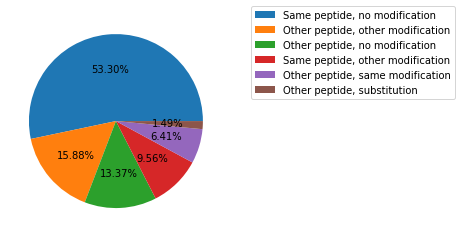

In [418]:
plt.pie(ionbotdata, autopct='%1.2f%%')
plt.legend(labels=ionbotdata.index, bbox_to_anchor=(1.1, 1.05))
plt.show

## MSFRAGGER

In [419]:
notfoundbyfragger = scanscomp_bare[scanscomp_bare["Found_by_MSFragger"] == 0]
notfoundbyfragger = notfoundbyfragger.drop(notfoundbyfragger.filter(regex="Found|ionbot|pfind"), axis=1)
notfoundbyfragger.shape

(2595, 4)

In [420]:
Foundornot2 = notfoundbyfragger.groupby(["Sequence","PTM"]).count().reset_index()
Foundornot2.shape

(666, 4)

In [421]:
Foundornot2["fragger_PSM"].value_counts()[0]

249

In [422]:
percentage_no_psm = 249/666*100
percentage_psm = 100-percentage_no_psm
print("Another PSM was found by MSFragger for {:.2f}% of cases".format(percentage_psm))

Another PSM was found by MSFragger for 62.61% of cases


In [423]:
otherPSMs2 = notfoundbyfragger[notfoundbyfragger["fragger_PSM"].notna()]

In [424]:
otherPSMs2["PSMseq"] = otherPSMs2["fragger_PSM"].apply(lambda x: x.split("/")[0])
otherPSMs2["Assmod"] = otherPSMs2["fragger_PSM"].apply(lambda x: x.split("/")[1])
otherPSMs2["Obsmod"] = otherPSMs2["fragger_PSM"].apply(lambda x: x.split("/")[2])
otherPSMs2 = otherPSMs2.drop("fragger_PSM", axis=1)

/tmp/ipykernel_1752573/736041940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  otherPSMs2["PSMseq"] = otherPSMs2["fragger_PSM"].apply(lambda x: x.split("/")[0])
/tmp/ipykernel_1752573/736041940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  otherPSMs2["Assmod"] = otherPSMs2["fragger_PSM"].apply(lambda x: x.split("/")[1])
/tmp/ipykernel_1752573/736041940.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [425]:
otherPSMs2["Which is it then?"] = otherPSMs2.apply(which_is_it_then, Fragger=True, axis=1)

In [426]:
Fraggerdata = otherPSMs2["Which is it then?"].value_counts()

<function matplotlib.pyplot.show(close=None, block=None)>

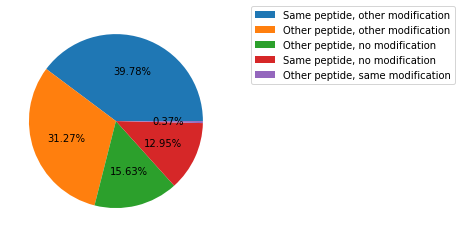

In [466]:
plt.pie(Fraggerdata, autopct='%1.2f%%')
plt.legend(labels=Fraggerdata.index, bbox_to_anchor=(1.1, 1.05))
plt.show

## PFIND

In [428]:
notfoundbypfind = scanscomp_bare[scanscomp_bare["Found_by_pFind"] == 0]
notfoundbypfind = notfoundbypfind.drop(notfoundbypfind.filter(regex="Found|ionbot|fragger"), axis=1)
notfoundbypfind.shape

(2764, 4)

In [429]:
#Enkel 002516 want bij PXD004010 werden de spectrum files niet meer teruggevonden dus alles zal nan zijn
notfoundbypfind002516 = notfoundbypfind[notfoundbypfind["Project"] == "PXD002516"]

In [430]:
Foundornot3 = notfoundbypfind002516.groupby(["Sequence","PTM"]).count().reset_index()
Foundornot3.shape

(119, 4)

In [431]:
Foundornot3["pfind_PSM"].value_counts()[0]

94

In [432]:
percentage_no_psm = 94/119*100
percentage_psm = 100-percentage_no_psm
print("Another PSM was found by pFind for {:.2f}% of cases".format(percentage_psm))

Another PSM was found by pFind for 21.01% of cases


In [433]:
otherPSMs3 = notfoundbypfind002516[notfoundbypfind002516["pfind_PSM"].notna()]

In [434]:
otherPSMs3["PSMseq"] = otherPSMs3["pfind_PSM"].apply(lambda x: x.split("/")[0])
otherPSMs3["Modification"] = otherPSMs3["pfind_PSM"].apply(lambda x: x.split("/")[1])
otherPSMs3 = otherPSMs3.drop("pfind_PSM", axis=1)

/tmp/ipykernel_1752573/1701345639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  otherPSMs3["PSMseq"] = otherPSMs3["pfind_PSM"].apply(lambda x: x.split("/")[0])
/tmp/ipykernel_1752573/1701345639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  otherPSMs3["Modification"] = otherPSMs3["pfind_PSM"].apply(lambda x: x.split("/")[1])


In [437]:
otherPSMs3["Which is it then?"] = otherPSMs3.apply(which_is_it_then, pFind=True, axis=1)

In [444]:
otherPSMs3.head()

,Sequence,PTM,Project,PSMseq,Modification,Which is it then?
37,IAKPLSSLTPLIAAAK,Acetyl,PXD002516,VLDALFPCVQGGTTAIPGAFGCGK,"8,Propionamide[C];22,Carbamidomethyl[C];","Other peptide, other modification"
79,IKDPDASKPEDWDER,Acetyl,PXD002516,LDEDLAAYCR,"9,Carbamidomethyl[C];","Other peptide, other modification"
224,SKEFQLFSSPHGK,Acetyl,PXD002516,ILIANTGMDTDKIK,nan,"Other peptide, no modification"
699,KTDDVEAMSSQPALALDER,Acetyl,PXD002516,KTDDVEAMSSQPALALDER,"8,Carbamyl[M];","Same peptide, other modification"
700,KTDDVEAMSSQPALALDER,Acetyl,PXD002516,KTDDVEAMSSQPALALDER,"8,Carbamyl[M];","Same peptide, other modification"


In [440]:
pfinddata = otherPSMs3["Which is it then?"].value_counts()

<function matplotlib.pyplot.show(close=None, block=None)>

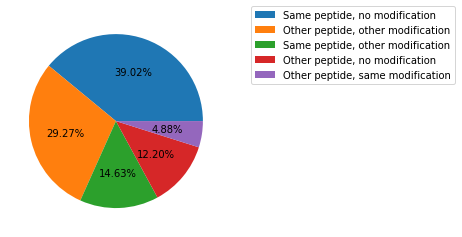

In [465]:
plt.pie(pfinddata, autopct='%1.2f%%')
plt.legend(labels=pfinddata.index, bbox_to_anchor=(1.1, 1.05))
plt.show

In [487]:
labels

{'Other peptide, no modification',
 'Other peptide, other modification',
 'Other peptide, same modification',
 'Other peptide, substitution',
 'Same peptide, no modification',
 'Same peptide, other modification',
 'Same peptide, substitution'}

In [500]:
colors={'Other peptide, no modification': 'purple',
'Other peptide, other modification': "orange",
"Other peptide, same modification": "cyan",
"Other peptide, substitution" : "goldenrod",
'Same peptide, no modification' : "red",
'Same peptide, other modification' : "pink",
'Same peptide, substitution':"green"}

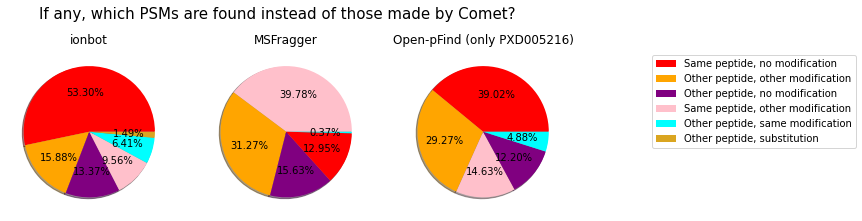

In [529]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(131)
ax1.pie(ionbotdata, autopct='%1.2f%%', colors=[colors[v] for v in ionbotdata.keys()], shadow=True)
ax1.title.set_text("ionbot")
ax2 = fig.add_subplot(132)
ax2.pie(Fraggerdata, autopct="%1.2f%%", colors=[colors[v] for v in Fraggerdata.keys()], shadow=True)
ax2.title.set_text("MSFragger")
ax3 = fig.add_subplot(133)
ax3.pie(pfinddata, autopct="%1.2f%%", colors=[colors[v] for v in pfinddata.keys()], shadow=True)
ax3.title.set_text("Open-pFind (only PXD005216)")
ax1.legend(labels = ionbotdata.keys(), bbox_to_anchor=(5.2,1))
fig.suptitle("If any, which PSMs are found instead of those made by Comet?", fontsize=15)
plt.subplots_adjust(top=1.4)
plt.show()